In [4]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
#loading the dataset
df=pd.read_csv('c:\\Users\\ASUS\\OneDrive\\문서\\ML Project\\Classification Assignment\\updated_Airline_data.csv')


In [3]:
#getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14215 non-null  int64  
 1   airline          14215 non-null  object 
 2   overall          14215 non-null  float64
 3   author           14215 non-null  object 
 4   review_date      14215 non-null  object 
 5   customer_review  14215 non-null  object 
 6   aircraft         14215 non-null  object 
 7   traveller_type   14215 non-null  object 
 8   cabin            14215 non-null  object 
 9   date_flown       14215 non-null  object 
 10  seat_comfort     14215 non-null  float64
 11  cabin_service    14215 non-null  float64
 12  food_bev         14215 non-null  float64
 13  entertainment    14215 non-null  float64
 14  ground_service   14215 non-null  float64
 15  value_for_money  14215 non-null  float64
 16  recommended      14215 non-null  object 
 17  sentiment   

In [5]:
df.shape

(14215, 19)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14215 non-null  int64  
 1   airline          14215 non-null  object 
 2   overall          14215 non-null  float64
 3   author           14215 non-null  object 
 4   review_date      14215 non-null  object 
 5   customer_review  14215 non-null  object 
 6   aircraft         14215 non-null  object 
 7   traveller_type   14215 non-null  object 
 8   cabin            14215 non-null  object 
 9   date_flown       14215 non-null  object 
 10  seat_comfort     14215 non-null  float64
 11  cabin_service    14215 non-null  float64
 12  food_bev         14215 non-null  float64
 13  entertainment    14215 non-null  float64
 14  ground_service   14215 non-null  float64
 15  value_for_money  14215 non-null  float64
 16  recommended      14215 non-null  object 
 17  sentiment   

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14215.0,56726.524376,36332.796264,7.0,25996.0,54269.0,85870.0,131712.0
overall,14215.0,6.483152,3.050922,1.0,4.0,8.0,9.0,10.0
seat_comfort,14215.0,3.492719,1.336645,1.0,3.0,4.0,5.0,5.0
cabin_service,14215.0,3.742948,1.417064,1.0,3.0,4.0,5.0,5.0
food_bev,14215.0,3.318044,1.425094,1.0,2.0,4.0,5.0,5.0
entertainment,14215.0,3.333873,1.398894,1.0,2.0,4.0,5.0,5.0
ground_service,14215.0,3.468801,1.412519,1.0,2.0,4.0,5.0,5.0
value_for_money,14215.0,3.564756,1.402578,1.0,3.0,4.0,5.0,5.0


In [9]:
df.columns

Index(['Unnamed: 0', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'sentiment',
       'aircraft_brands'],
      dtype='object')

In [10]:
for i in df.columns:
    print(i,"\n\n",df[i].unique(),"\n\n")

Unnamed: 0 

 [     7     15     17 ... 131696 131702 131712] 


airline 

 ['Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 

In [11]:
df.drop(columns=["Unnamed: 0", "author", "customer_review", "aircraft_brands","aircraft","entertainment","airline","review_date"], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          14215 non-null  float64
 1   traveller_type   14215 non-null  object 
 2   cabin            14215 non-null  object 
 3   date_flown       14215 non-null  object 
 4   seat_comfort     14215 non-null  float64
 5   cabin_service    14215 non-null  float64
 6   food_bev         14215 non-null  float64
 7   ground_service   14215 non-null  float64
 8   value_for_money  14215 non-null  float64
 9   recommended      14215 non-null  object 
 10  sentiment        14215 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


**Finding unique values in the dataset**


In [13]:
for i in df.columns:
    print(i,"\n\n",df[i].unique(),"\n\n")

overall 

 [10.  2.  6.  1.  5.  7.  8.  9.  4.  3.] 


traveller_type 

 ['Solo Leisure' 'Couple Leisure' 'Business' 'Family Leisure' 'Traveller'] 


cabin 

 ['Economy Class' 'Business Class' 'First Class' 'Premium Economy'] 


date_flown 

 ['April 2019' 'February 2019' 'March 2019' 'April 2018' 'January 2019'
 'November 2018' 'December 2018' 'September 2018' 'October 2018'
 'August 2018' 'July 2018' 'June 2018' 'January 2018' 'May-18'
 'December 2017' 'March 2018' 'February 2018' 'November 2017'
 'August 2017' 'October 2017' 'July 2017' 'November 2016' 'September 2017'
 'June 2017' 'May-17' 'April 2017' 'March 2017' 'February 2017'
 'January 2017' 'October 2016' 'December 2016' 'September 2016'
 'March 2016' 'May-16' 'August 2016' 'December 2015' 'June 2016'
 'July 2016' 'April 2016' 'February 2016' 'January 2016' 'May-15'
 'July 2015' 'June 2015' 'November 2015' 'August 2015' 'October 2015'
 'February 2015' 'December 2014' 'September 2015' 'January 2015' 'May-19'
 'March 2015' 'Ap

In [14]:
df.isnull().sum()

overall            0
traveller_type     0
cabin              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
ground_service     0
value_for_money    0
recommended        0
sentiment          0
dtype: int64

In [15]:
df.shape

(14215, 11)

In [16]:
def con_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%b-%y')
    except:
        try:
            return pd.to_datetime(date_str, format='%B %Y')
        except:
            return pd.NaT

df['date_flown'] = df['date_flown'].apply(con_date)



In [17]:
df['Year'] = df['date_flown'].dt.year
df['Month'] = df['date_flown'].dt.month

In [18]:
df.columns

Index(['overall', 'traveller_type', 'cabin', 'date_flown', 'seat_comfort',
       'cabin_service', 'food_bev', 'ground_service', 'value_for_money',
       'recommended', 'sentiment', 'Year', 'Month'],
      dtype='object')

In [19]:
df['seat_comfort'] = df['seat_comfort'].astype(int)
df['cabin_service'] = df['cabin_service'].astype(int)
df['food_bev'] = df['food_bev'].astype(int)
df['ground_service'] = df['ground_service'].astype(int)
df['value_for_money'] = df['value_for_money'].astype(int)
df['overall'] = df['overall'].astype(int)


In [20]:
df.head()

,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,sentiment,Year,Month
0,10,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,yes,positive,2019,4
1,2,Solo Leisure,Economy Class,2019-04-01,3,3,2,1,2,no,positive,2019,4
2,6,Solo Leisure,Economy Class,2019-04-01,2,3,3,3,3,yes,positive,2019,4
3,1,Solo Leisure,Economy Class,2019-02-01,1,1,1,1,1,no,negative,2019,2
4,2,Solo Leisure,Economy Class,2019-03-01,1,3,2,1,1,no,positive,2019,3


In [21]:
df.isnull().sum()

overall            0
traveller_type     0
cabin              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
ground_service     0
value_for_money    0
recommended        0
sentiment          0
Year               0
Month              0
dtype: int64

Text(0.5, 0, 'Overall Ratings')

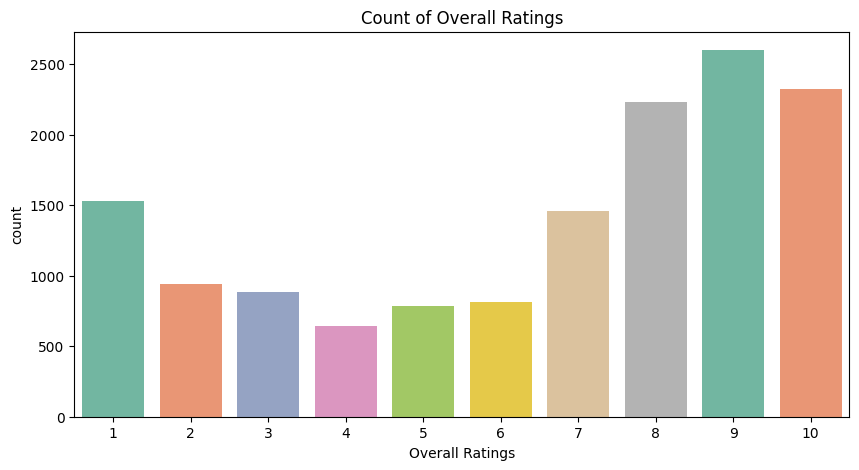

In [22]:
#exploratory data analysis
#univariate analysis
df['overall'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(x='overall', data=df, palette='Set2')
plt.title('Count of Overall Ratings')
plt.xlabel('Overall Ratings')       

<Axes: xlabel='count', ylabel='traveller_type'>

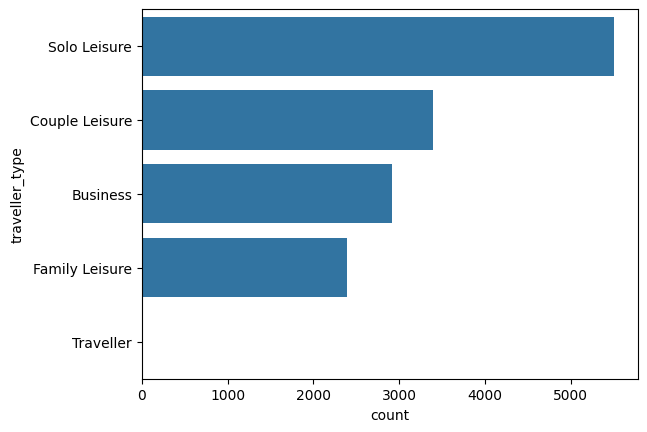

In [23]:
#1. traveler type by ratings -columns used-traveler type and overall rating 
sns.countplot(df['traveller_type'])

Text(0.5, 1.0, 'Sentiment Analysis of Reviews')

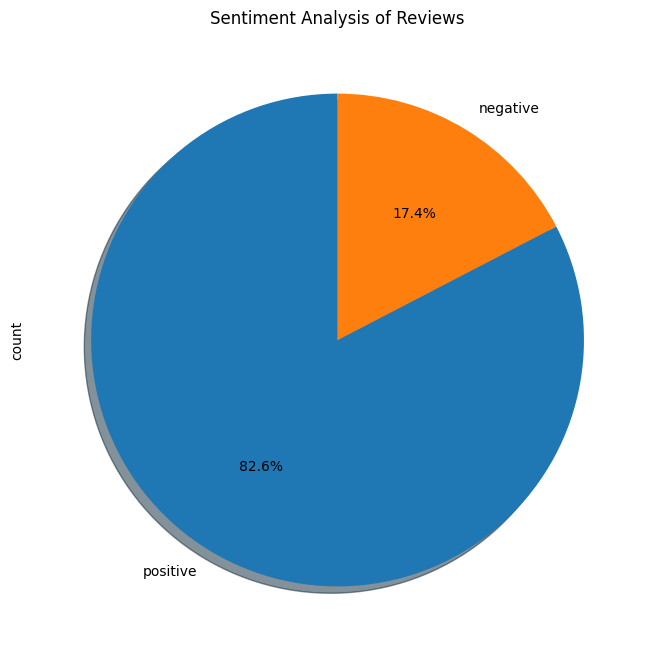

In [24]:
#pie chart for sentiment analysis
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, figsize=(8, 8))
plt.title('Sentiment Analysis of Reviews')


<Axes: ylabel='count'>

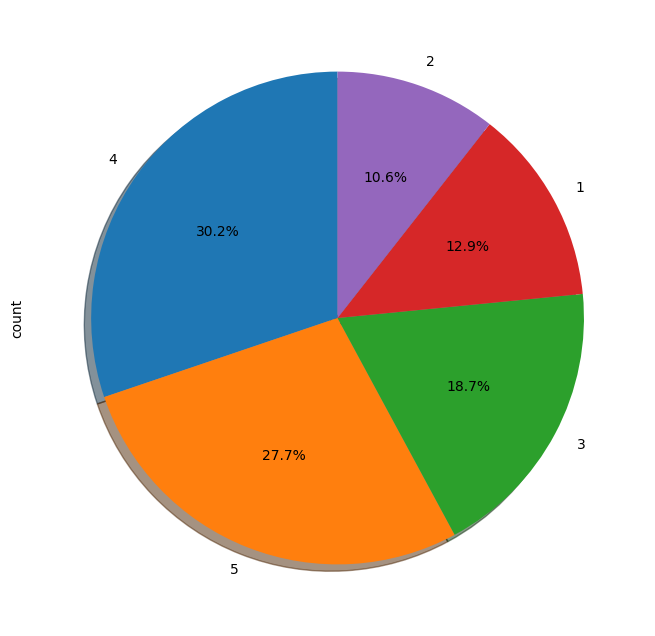

In [25]:
#pie chart for seat comfort
df['seat_comfort'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, figsize=(8, 8))

<Axes: ylabel='count'>

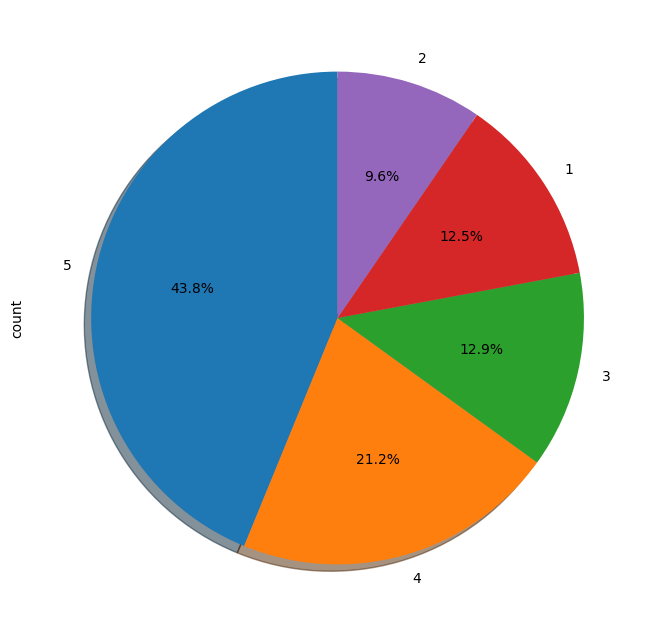

In [26]:
#pie chart for cabin service
df['cabin_service'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, figsize=(8, 8))

<Axes: ylabel='count'>

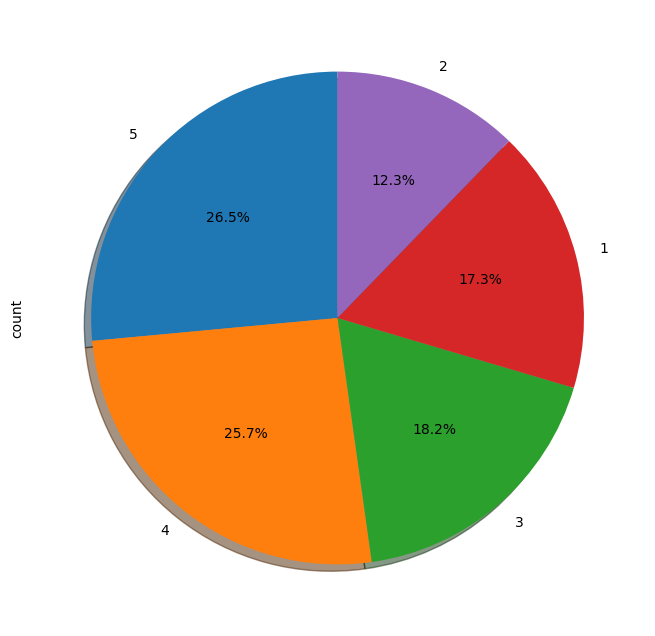

In [27]:
#pie chart for food beverage
df['food_bev'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, figsize=(8, 8)) 

<Axes: ylabel='count'>

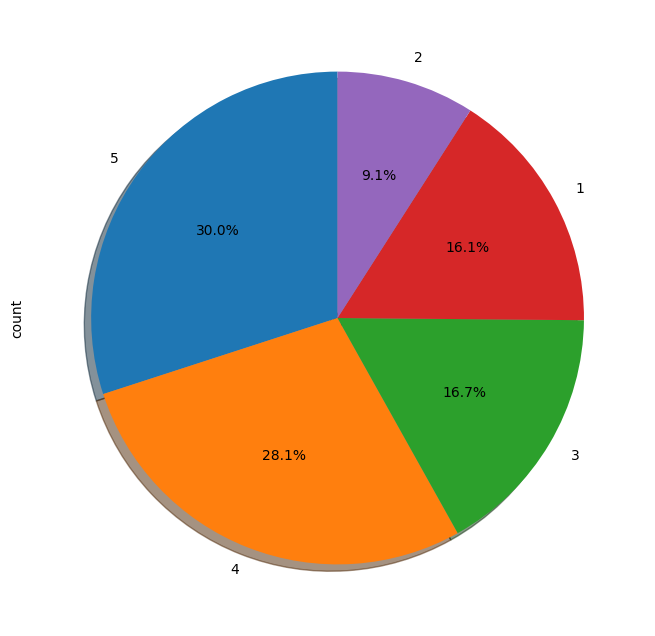

In [30]:
#pie chart for ground service
df['ground_service'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, figsize=(8, 8))

<Axes: xlabel='traveller_type', ylabel='count'>

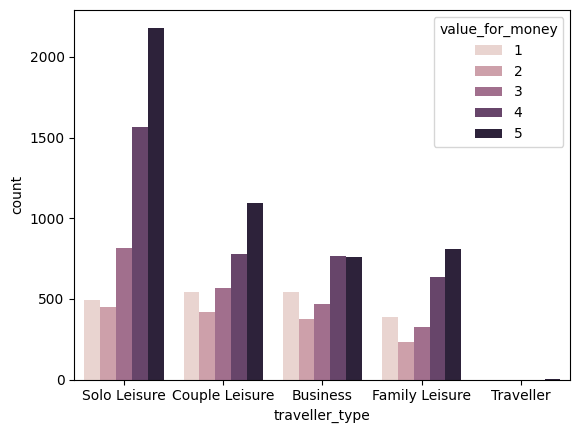

In [31]:
#bivariate analysis
#3.type of travel which has more value for money -traveler type and value for money 

sns.countplot(x='traveller_type',hue='value_for_money',data=df)

<Axes: xlabel='cabin', ylabel='seat_comfort'>

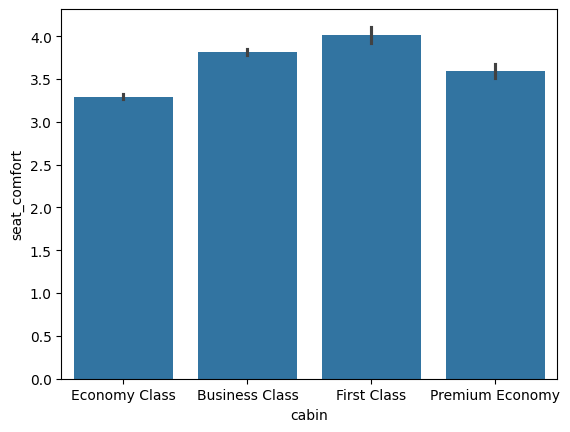

In [32]:
#seat comfort by cabin 
sns.barplot(x='cabin',y='seat_comfort',data=df)

<Axes: xlabel='cabin', ylabel='value_for_money'>

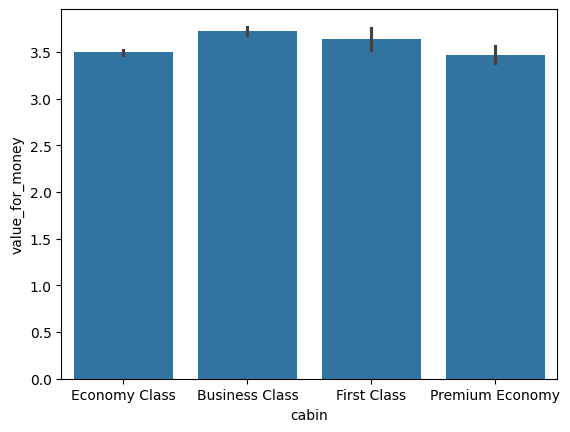

In [33]:
#value for money by economy class 
sns.barplot(x='cabin',y='value_for_money',data=df)

<Axes: xlabel='Month', ylabel='count'>

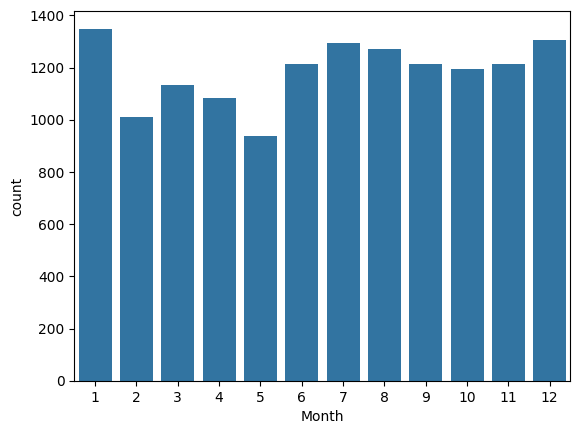

In [36]:
#date flown by month
sns.countplot(x='Month',data=df)




<Axes: xlabel='Year', ylabel='count'>

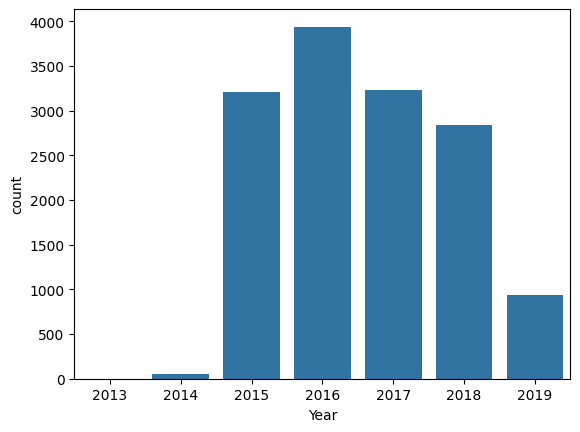

In [38]:
#date flown by year
sns.countplot(x='Year',data=df)


<Axes: xlabel='Year', ylabel='count'>

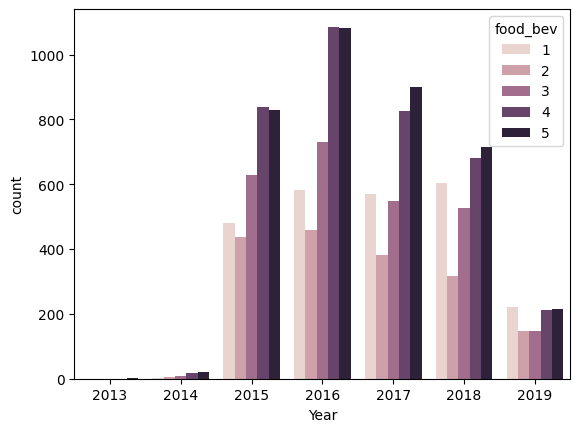

In [40]:
#food beverage by year
sns.countplot(x='Year',hue='food_bev',data=df)

<Axes: xlabel='Year', ylabel='count'>

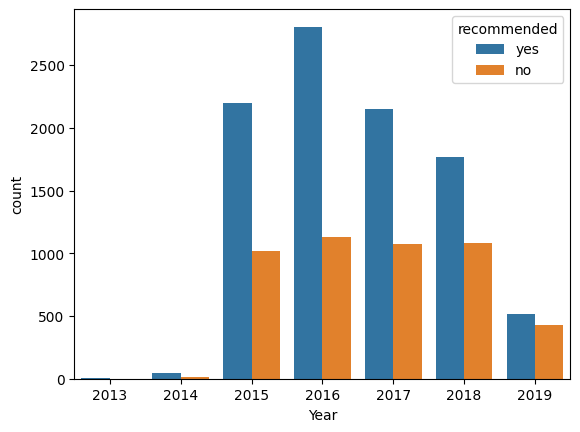

In [42]:
#recommendations by year 
sns.countplot(x='Year',hue='recommended',data=df)

<Axes: xlabel='Month', ylabel='count'>

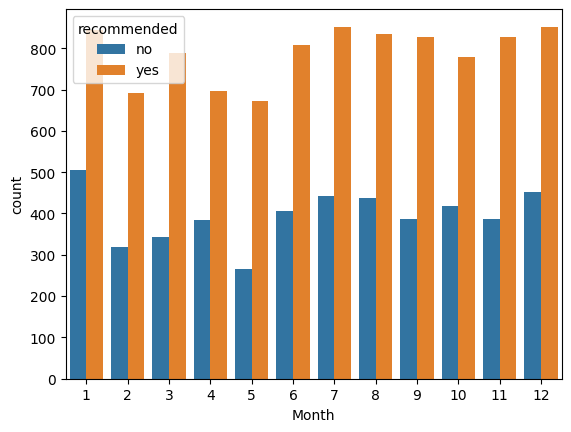

In [43]:
#recommended by month 
sns.countplot(x='Month',hue='recommended',data=df)

<Axes: xlabel='Month', ylabel='count'>

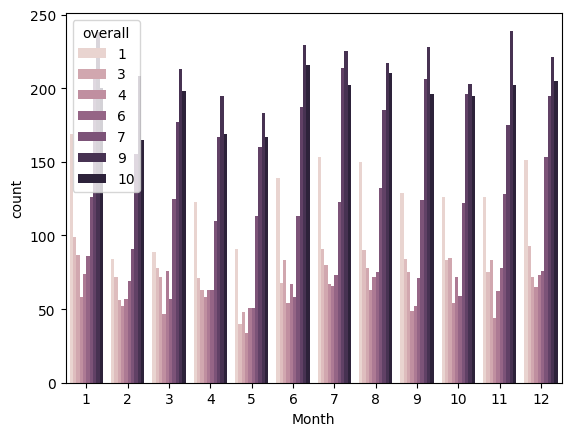

In [45]:
#multivariate analysis
#4. overall rating by month and year -overall rating, month and year
sns.countplot(x='Month',hue='overall',data=df)

<Axes: xlabel='Year', ylabel='count'>

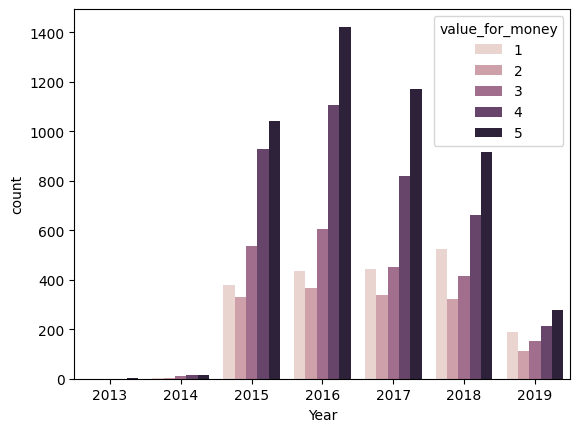

In [46]:
#value for money by year
sns.countplot(x='Year',hue='value_for_money',data=df)

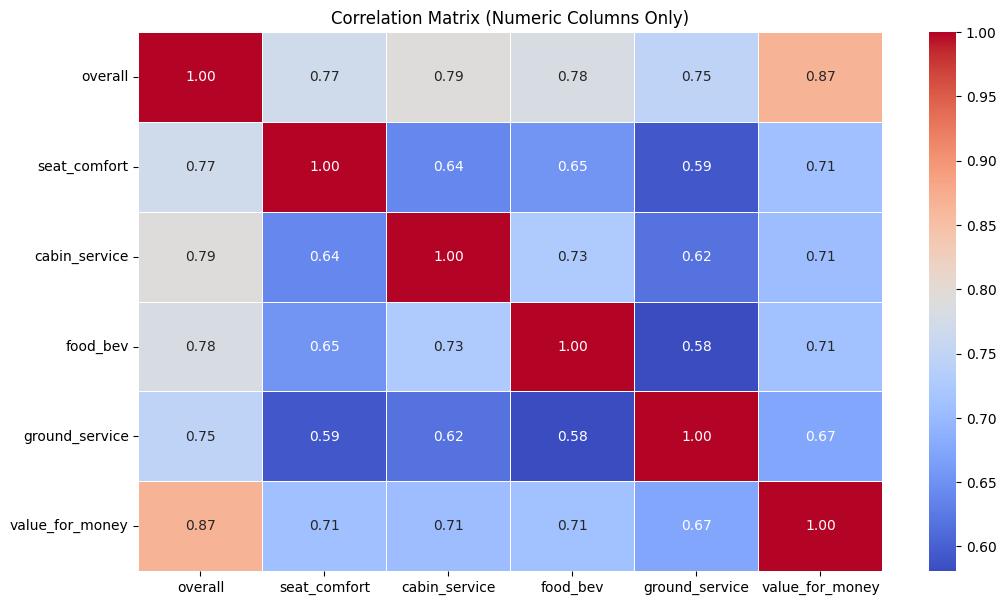

In [47]:
#correlation analysis
plt.figure(figsize=(12, 7))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

<Axes: >

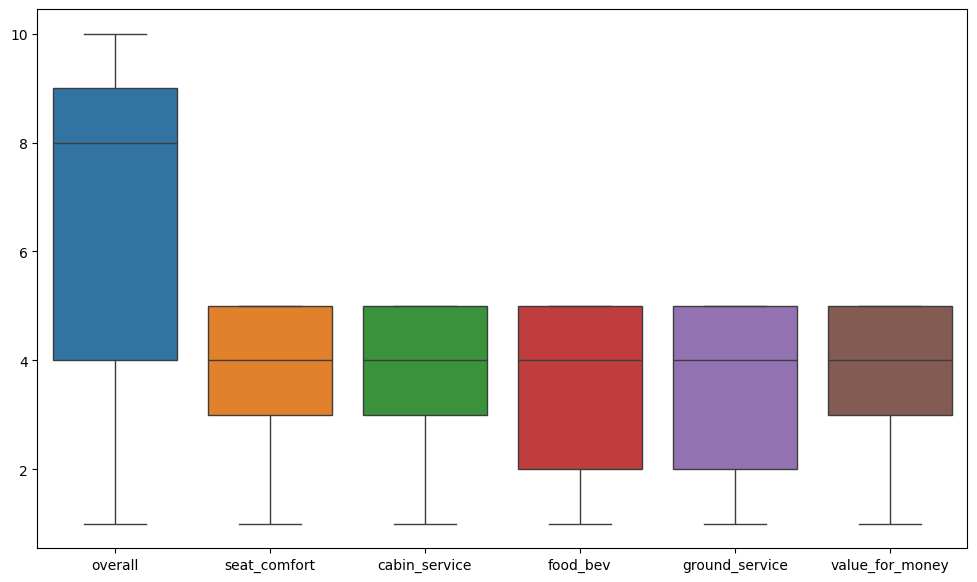

In [50]:
#checking for outliers      
plt.figure(figsize=(12,7))
sns.boxplot(data=df[['overall','seat_comfort','cabin_service','food_bev','ground_service','value_for_money']])

In [ ]:
# Feature Engineering

###### One Hot Encoding

In [51]:
df.head()

,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,sentiment,Year,Month
0,10,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,yes,positive,2019,4
1,2,Solo Leisure,Economy Class,2019-04-01,3,3,2,1,2,no,positive,2019,4
2,6,Solo Leisure,Economy Class,2019-04-01,2,3,3,3,3,yes,positive,2019,4
3,1,Solo Leisure,Economy Class,2019-02-01,1,1,1,1,1,no,negative,2019,2
4,2,Solo Leisure,Economy Class,2019-03-01,1,3,2,1,1,no,positive,2019,3


In [52]:
df = pd.get_dummies(df, columns = ['traveller_type','cabin'],drop_first=True)

In [53]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [54]:
#label encoding 
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})


In [55]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [56]:
df.head()

,overall,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,sentiment,Year,Month,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,traveller_type_Traveller,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
0,10,2019-04-01,4,5,5,5,5,1,1,2019,4,False,False,True,False,True,False,False
1,2,2019-04-01,3,3,2,1,2,0,1,2019,4,False,False,True,False,True,False,False
2,6,2019-04-01,2,3,3,3,3,1,1,2019,4,False,False,True,False,True,False,False
3,1,2019-02-01,1,1,1,1,1,0,0,2019,2,False,False,True,False,True,False,False
4,2,2019-03-01,1,3,2,1,1,0,1,2019,3,False,False,True,False,True,False,False


In [57]:
df['recommended'].value_counts()

recommended
1    9471
0    4744
Name: count, dtype: int64

In [58]:
df = df.drop(['date_flown'], axis = 1)

In [59]:
df.columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev',
       'ground_service', 'value_for_money', 'recommended', 'sentiment', 'Year',
       'Month', 'traveller_type_Couple Leisure',
       'traveller_type_Family Leisure', 'traveller_type_Solo Leisure',
       'traveller_type_Traveller', 'cabin_Economy Class', 'cabin_First Class',
       'cabin_Premium Economy'],
      dtype='object')

In [61]:
x = df.drop(['recommended'], axis = 1).values
y = df['recommended'].values

In [62]:
#model preparation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [64]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [65]:
df.isnull().sum()

overall                          0
seat_comfort                     0
cabin_service                    0
food_bev                         0
ground_service                   0
value_for_money                  0
recommended                      0
sentiment                        0
Year                             0
Month                            0
traveller_type_Couple Leisure    0
traveller_type_Family Leisure    0
traveller_type_Solo Leisure      0
traveller_type_Traveller         0
cabin_Economy Class              0
cabin_First Class                0
cabin_Premium Economy            0
dtype: int64

In [66]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [67]:
log_pred = log.predict(x_test)
log_pred

array([1, 0, 1, ..., 0, 0, 1])

In [68]:
import numpy as np

# Check for NaN values in x_train
print(np.isnan(x_train).sum())

# Check for NaN values in x_test
print(np.isnan(x_test).sum())


0
0


In [69]:
#printing the score of the model
print("Training Score: ", round(log.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(log.score(x_test, y_test)*100,2), "%")

Training Score:  95.07 %
Testing Score:  95.31 %


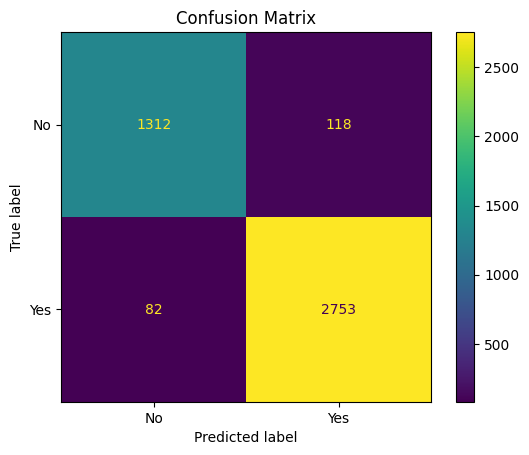

Accuracy       : 0.95
Error Rate     : 0.05
Precision (Yes): 0.96
Recall (Yes)   : 0.97
F1 Score (Yes) : 0.96


In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, log_pred , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, log_pred )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, log_pred , pos_label=1)
recall = recall_score(y_test, log_pred , pos_label=1)
f1 = f1_score(y_test, log_pred , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### Decision tree classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [73]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([1, 0, 1, ..., 0, 0, 1])

In [74]:

print("Training Score: ", (dt.score(x_train, y_train)*100), "%")
print("Testing Score: ", (dt.score(x_test, y_test)*100), "%")

Training Score:  99.94974874371859 %
Testing Score:  93.31770222743259 %


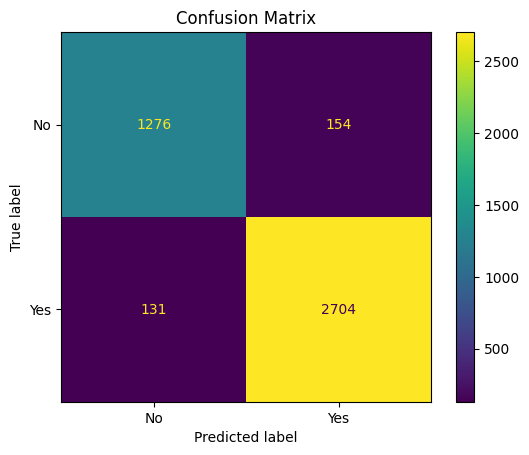

Accuracy       : 0.93
Error Rate     : 0.07
Precision (Yes): 0.95
Recall (Yes)   : 0.95
F1 Score (Yes) : 0.95


In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, y_pred_dt , pos_label=1)
recall = recall_score(y_test, y_pred_dt , pos_label=1)
f1 = f1_score(y_test, y_pred_dt , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

Random Tree Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [77]:
y_pred_rf = rf.predict(x_test)
y_pred_rf



array([1, 0, 1, ..., 0, 0, 1])

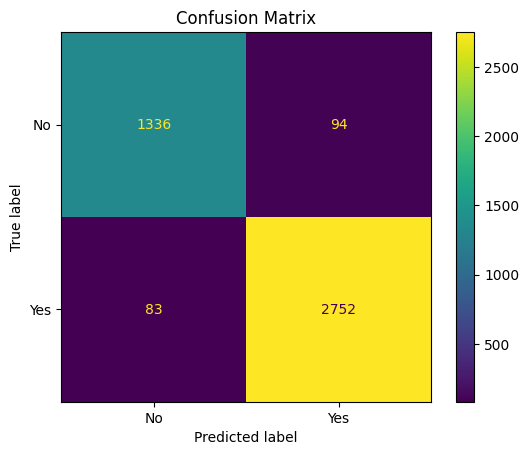

Accuracy       : 0.96
Error Rate     : 0.04
Precision (Yes): 0.97
Recall (Yes)   : 0.97
F1 Score (Yes) : 0.97


In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, y_pred_rf , pos_label=1)
recall = recall_score(y_test, y_pred_rf , pos_label=1)
f1 = f1_score(y_test, y_pred_rf , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

cross validations

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
print("Training:", ((cross_val_score(rf, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(rf, x_test, y_test))*100).mean().astype(int), "%")

Training: 95 %
Testing: 95 %


support vector machines

In [82]:
from sklearn.svm import SVC


In [83]:
from sklearn.svm import SVC

svm = SVC()  
svm.fit(x_train, y_train)


SVC()

In [84]:

# Predict on test data
y_pred_svm = svm.predict(x_test)


In [85]:
print(y_pred_svm)

[1 0 1 ... 0 0 1]


In [86]:

# Training accuracy
print("Training Score: ", round(svm.score(x_train, y_train) * 100, 2), "%")
print("Testing Score: ", round(svm.score(x_test, y_test)*100,2), "%")

Training Score:  95.75 %
Testing Score:  95.19 %


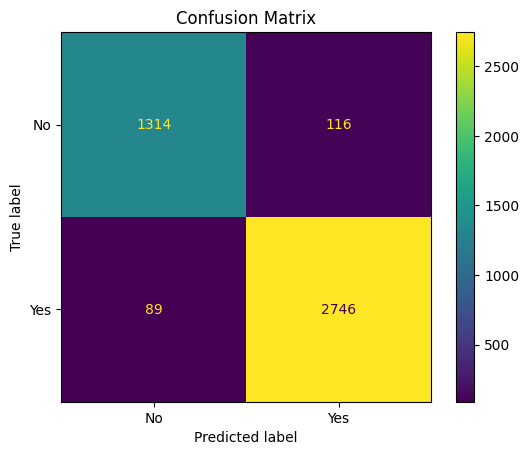

Accuracy       : 0.95
Error Rate     : 0.05
Precision (Yes): 0.96
Recall (Yes)   : 0.97
F1 Score (Yes) : 0.96


In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_svm )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, y_pred_svm , pos_label=1)
recall = recall_score(y_test, y_pred_svm , pos_label=1)
f1 = f1_score(y_test, y_pred_svm , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [90]:
y_pred_knn = knn.predict(x_test)
y_pred_knn


array([1, 0, 1, ..., 0, 0, 1])

In [91]:

print("Training Score: ", round(knn.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(knn.score(x_test, y_test)*100,2), "%")

Training Score:  94.75 %
Testing Score:  93.93 %


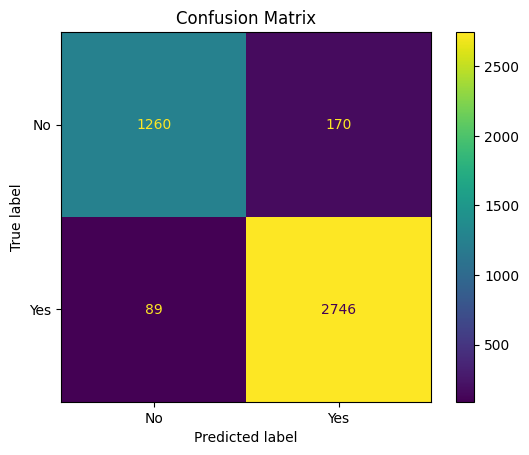

Accuracy       : 0.94
Error Rate     : 0.06
Precision (Yes): 0.94
Recall (Yes)   : 0.97
F1 Score (Yes) : 0.95


In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn, labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_knn)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, y_pred_knn, pos_label=1)
recall = recall_score(y_test, y_pred_knn, pos_label=1)
f1 = f1_score(y_test, y_pred_knn, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

Cross Validations

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
print("\nRandom Forest Classifier: ")

print("Training:", ((cross_val_score(rf, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(rf, x_test, y_test,cv=5).mean() * 100)), "%")

print("\nDecision Tree Classifier: ")

print("Training:", ((cross_val_score(dt, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(dt, x_test, y_test,cv=5).mean() * 100)), "%")

print("\nLogistic Regression:")

print("Training:", ((cross_val_score(log, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(log, x_test, y_test,cv=5).mean() * 100)), "%")

print("\nK Nearest Neighbor Classifier: ")

print("Training:", ((cross_val_score(knn, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(knn, x_test, y_test,cv=5).mean() * 100)), "%")

print("\nSupport Vector Classifier: ")

print("Training:", ((cross_val_score(svm, x_train, y_train,cv=5).mean() * 100)), "%")
print("Testing:", ((cross_val_score(svm, x_test, y_test,cv=5).mean() * 100)), "%")




Random Forest Classifier: 
Training: 94.98492462311559 %
Testing: 95.24032825322392 %

Decision Tree Classifier: 
Training: 92.24120603015076 %
Testing: 92.59085580304807 %

Logistic Regression:
Training: 94.93467336683418 %
Testing: 95.28722157092614 %

K Nearest Neighbor Classifier: 
Training: 93.7889447236181 %
Testing: 93.52872215709262 %

Support Vector Classifier: 
Training: 94.84422110552764 %
Testing: 94.91207502930831 %
